In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]],columns=['cgpa','profile_score','lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [3]:
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    
    # Lets initialize w as 0.1 as b as 0 for first run
    
    for l in range(1,L):
        parameters['W'+ str(l)] = np.ones((layer_dims[l-1], layer_dims[l])) * 0.1
        parameters['b'+ str(l)] = np.zeros((layer_dims[l],1))
        
    return parameters

In [4]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

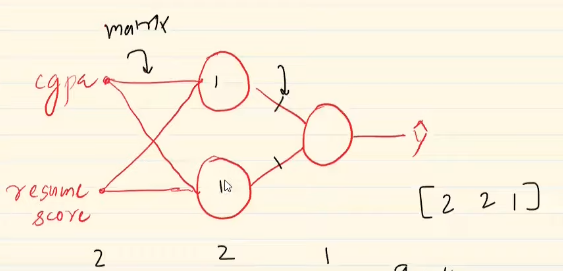

In [5]:
def linear_activation(A_prev,w,b):
    Z = np.dot(w.T, A_prev) + b
    
    return Z

### Forward propagation

In [6]:
def L_layer_forward(X, parameters):
    A = X
    L = len(parameters) // 2    # Numbe rof layers in neural Network
    
    for l in range(1, L+1):
        A_prev = A
        
        W1 = parameters['W'+ str(l)]
        b1 = parameters['b'+ str(l)]
        
        # print("A"+str(l-1)+": ", A_prev)
        # print("W"+str(l-1)+": ",W1)
        # print("b"+str(l-1)+": ",b1)
        # print("--"*20)
        
        A = linear_activation(A_prev, w=W1,b=b1)
        # print("A"+str(l)+": ",A)
        # print("--"*20)
        
    return A,A_prev 

### Lets test the function for one single row (first row)

In [7]:


X = df[['cgpa','profile_score']].values[0].reshape(2,1)   # Shape (no of features, no of trainingg examples)
y = df[['lpa']].values[0][0]

In [8]:
# parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat, A1 = L_layer_forward(X, parameters)

### A = records/ data points in dataset
### W = Weights
### b = Biases

In [9]:
def update_parameters(parameters,y,y_hat,A1,X):
    parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
    parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
    parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))
    
    parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
    parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
    parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

    parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
    parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
    parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [10]:
y_hat = y_hat[0][0]
A1

array([[1.6],
       [1.6]])

In [11]:
update_parameters(parameters, y, y_hat, A1, X)

In [12]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

### The paramaters have changed, 

### We have completed one cycle now all we have to do is repeat the process for all the data points

In [13]:
X = df[['cgpa','profile_score']].values[3].reshape(2,1)   # Shape (no of features, no of trainingg examples)
y = df[['lpa']].values[3][0]

y_hat, A1 = L_layer_forward(X, parameters)
y_hat = y_hat[0][0]
y_hat

update_parameters(parameters, y, y_hat, A1, X)
parameters

{'W1': array([[0.11533984, 0.1276017 ],
        [0.11533984, 0.1276017 ]]),
 'b1': array([[0.00257437],
        [0.00257437]]),
 'W2': array([[0.13525283],
        [0.13525283]]),
 'b2': array([[0.14820409]])}

### Implementing Epochs in ANN now with single block of code

In [15]:
parameters = initialize_parameters([2,2,1])
epochs = 75

for i in range(epochs):
    
    Loss = []
    
    for j in range(df.shape[0]):
        X = df[['cgpa','profile_score']].values[j].reshape(2,1)
        y = df[['lpa']].values[j][0]
        
        y_hat, A1 = L_layer_forward(X, parameters)
        y_hat = y_hat[0][0]
        
        update_parameters(parameters, y, y_hat, A1, X)
        
        Loss.append((y-y_hat)**2)
        
    print("Epoch - ", i+1 ,' Loss - ', np.array(Loss).mean())

parameters, y_hat

Epoch -  1  Loss -  25.321744156025517
Epoch -  2  Loss -  18.320004165722047
Epoch -  3  Loss -  9.473661050729628
Epoch -  4  Loss -  3.2520938634031613
Epoch -  5  Loss -  1.3407132589299962
Epoch -  6  Loss -  1.1726178458115697
Epoch -  7  Loss -  1.2331289135532644
Epoch -  8  Loss -  1.2686856723180788
Epoch -  9  Loss -  1.282007891421992
Epoch -  10  Loss -  1.2866806711744867
Epoch -  11  Loss -  1.288476448757492
Epoch -  12  Loss -  1.2893734737446345
Epoch -  13  Loss -  1.2900105013265912
Epoch -  14  Loss -  1.2905894146167813
Epoch -  15  Loss -  1.2911732610540008
Epoch -  16  Loss -  1.2917814457136612
Epoch -  17  Loss -  1.2924197441376692
Epoch -  18  Loss -  1.2930896977170947
Epoch -  19  Loss -  1.2937915386444643
Epoch -  20  Loss -  1.2945250957545444
Epoch -  21  Loss -  1.295290073585504
Epoch -  22  Loss -  1.2960861378967092
Epoch -  23  Loss -  1.2969129417424405
Epoch -  24  Loss -  1.2977701333821408
Epoch -  25  Loss -  1.298657358661543
Epoch -  26  L

({'W1': array([[-0.03224599,  0.68946973],
         [-0.03584466,  0.81971304]]),
  'b1': array([[0.02379137],
         [0.03076297]]),
  'W2': array([[0.37062912],
         [0.46354139]]),
  'b2': array([[0.46575413]])},
 5.893629701165794)